In [1]:
from random import randint

In [2]:
def Contains(A,B):

    for b in B:
        
        if(b not in A):

            return False

    return True

In [3]:
def Heirs(vertex,graph):
    
    N = len(graph)

    heirs = [j for j in range(N) if graph[vertex][j] == 1]

    return heirs

In [4]:
def Multi_Heirs(vertices, graph):

    multi_heirs = [Heirs(i,graph) for i in vertices]

    multi_heirs = [n for sub in multi_heirs for n in sub]

    return list(set(multi_heirs))

In [5]:
def Parents(vertex, graph):
    
    N = len (graph)
    
    parents = [j for j in range(N) if graph[j][vertex] == 1]
    
    return parents
    

In [6]:
def Multi_Parents(vertices, graph):

    multi_parents = [Parents(i,graph) for i in vertices]

    multi_parents = [n for sub in multi_parents for n in sub]

    return list(set(multi_parents))

In [7]:
def Ancestors(vertex, graph):
    
    ancestors = []
    
    new_ancestors = Parents(vertex, graph)
    
    while (not Contains(ancestors, new_ancestors)):
        
        ancestors += new_ancestors
        ancestors = list(set(ancestors))
        
        new_ancestors += Multi_Parents(new_ancestors, graph)
        new_ancestors = list(set(new_ancestors))
        
    return ancestors

In [8]:
def Multi_Ancestors(vertices,graph):
    
    multi_ancestors = [Ancestors(i,graph) for i in vertices]
    
    multi_ancestors = [n for sub in multi_ancestors for n in sub]
    
    return list(set(multi_ancestors))

In [9]:
def Descendants(vertex, graph):

    descendants = []

    new_descendants = Heirs(vertex, graph)

    while(not Contains(descendants, new_descendants)):

        descendants += new_descendants
        descendants = list(set(descendants))

        new_descendants += Multi_Heirs(new_descendants, graph)
        new_descendants = list(set(new_descendants))


    return descendants

In [10]:
def Multi_Descendants(vertices,graph):
    
    multi_descendants = [Descendants(i,graph) for i in vertices]
    
    multi_descendants = [n for sub in multi_Descendants for n in sub]
    
    return list(set(multi_descendants))

In [11]:
def Has_Cycle(graph):
    
    N = len(graph)

    for i in range(N):
        
        if(i in Descendants(i,graph)):

            return True
        
    return False

In [12]:
def Which_Cycle(graph):
    
    N = len(graph)

    for i in range(N):
        
        if(i in Descendants(i,graph)):

            print(i)

    if Has_Cycle(dag):
        print("Olha aqui:")
        Which_Cycle(dag)

In [13]:
def PrintAncestors(vertex,graph):
    if len(Parents(vertex,graph)) != 0:
        print (str(vertex),": ", Parents(vertex,graph))
        for i in Parents(vertex,graph):
            PrintAncestors(i,graph)
            
def PrintDescendants(vertex,graph):
    if len(Heirs(vertex,graph)) != 0:
        print (str(vertex),": ", Heirs(vertex,graph))
        for i in Heirs(vertex,graph):
            PrintDescendants(i,graph)

In [14]:
# Classificação de vértices

def FirstGeneration(graph):
    return [j for j in range(len(graph)) if len(Parents(j,graph)) == 0]
    
def LastGeneration(graph):
    return [j for j in range(len(graph)) if len(Heirs(j,graph)) == 0]

def Isolated(graph):
    return [j for j in range(len(graph)) if (len(Parents(j,graph)) == 0 and len(Heirs(j,graph)) == 0)]

In [15]:
# Topologia do grafo: Retorna todos os vértices com algum caminho de parentesco

def Connected_Subgraph (vertex, graph):
    
    connected = []
    
    new_connected = Ancestors(vertex,graph) + Descendants(vertex,graph)
    
    while not Contains(connected,new_connected):
        
        connected += new_connected
        connected = list(set(connected))
        
        new_connected += Multi_Ancestors(connected,graph) + Multi_Descendants(connected,graph)
        new_connected = list(set(new_connected))
        
    return connected

In [85]:
def Generations(graph):
    
    g = graph.copy()
    
    generations = []
    
    available = list(range(len(g)))
    
    while len(available) != 0:
        
        newfirst = FirstGeneration(g)
        
        generations.append([i for i in newfirst if i in available])
        
        available = [i for i in available if i not in newfirst]
        
        for i in range(len(newfirst)):
            
            g[newfirst[i]] = [0 for _ in range(len(g))]

    return generations

In [17]:
def RanDAG(n_vertices, n_edges):
    
    MaxEdges = int((n_vertices-1)*(n_vertices)/2)

    assert( n_edges <= MaxEdges )
  
    ranDag = [[0 for _ in range(n_vertices)] for _ in range(n_vertices)]
    
    edges = sample(range(MaxEdges-1), n_edges)
  
    for e in edges:
    
        i = int(0.5 * (1 + sqrt(8*e + 1)))
    
        j = e - int(0.5 * i * (i-1))
    
        ranDag[i][j] = 1
    
    return ranDag

In [18]:
from random import randint, sample
from math import sqrt

def RanDAG1(n_vertices, n_edges):
    
    assert( n_edges <= (n_vertices-1)*(n_vertices)/2)

    ranDag = [[0 for _ in range(n_vertices)] for _ in range(n_vertices)]

    edge_count = 0

    while(edge_count < n_edges):
        
        i = randint(0,n_vertices-1)
        j = randint(0,n_vertices-1)

        if( ranDag[i][j] == 0 ):

            ranDag[i][j] = 1

            if( Has_Cycle(ranDag) ):

                ranDag[i][j] = 0
            
            else:

                edge_count += 1

    return ranDag      

In [19]:
def RanDAG2 (n_vertices, n_edges):
    
    assert( n_edges <= (n_vertices-1)*(n_vertices)/2)

    ranDag = [[0 for _ in range(n_vertices)] for _ in range(n_vertices)]

    edge_count = 0

    multi_ancestors = [[i] for i in range(n_vertices)]

    counts = 0

    possible_parents = [j for j in range(n_vertices)]

    while edge_count < n_edges:

        if len(possible_parents) == 0:

            print("Não há mais arestas possíveis")

            break

        i = possible_parents[randint(0,len(possible_parents)-1)]

        available = []

        for j in range(n_vertices):

            if j not in multi_ancestors[i]:

                available.append(j)

        j = available[randint(0,len(available)-1)]

        ranDag[i][j] = 1

        edge_count+= 1

        for l in range(n_vertices):

            multi_ancestors[l] = multi_ancestors[l] + [k for k in multi_ancestors[i]]

            multi_ancestors[l] = list(set(multi_ancestors[l]))

        for l in possible_parents:

            if len(multi_ancestors[l]) == n_vertices:

                possible_parents.remove(l)

        if counts == 100000:

            print("Olha, demorou demais: ",edge_count," iterações. Pediu muitas arestas? Mexa no script e aumente o limite.")

            break

        counts += 1

    return ranDag

In [20]:
# Triangular inferior, n_edges binomial

def RanDAG3(n_vertices,n_edges):
    
    max_possible = (n_vertices-1)*(n_vertices)/2
    
    p = n_edges/((n_vertices-1)*(n_vertices)/2)

    graph = [[0 for _ in range(n_vertices)] for _ in range(n_vertices)]
    
    for i in range(len(graph)):
        
        for j in range(len(graph)):
            
            if j < i :
                
                graph[i][j] = int(randint(0,(n_vertices-1)*(n_vertices)/2) <= n_edges)

    return graph

In [21]:
from random import sample

def oldRanDAG(n_vertexes, n_edges):
    
    assert( n_edges <= (n_vertexes-1)*(n_vertexes)/2)
    
    ranDag = [[0 for _ in range(n_vertexes)] for _ in range(n_vertexes)]
  
    edges = [e for e in range(n_vertexes * n_vertexes) if e%(n_vertexes+1) != 0]

    edge_count = 0
    
    while(edge_count < n_edges):
    
        if( len(edges) == 0 ):
      
            return ranDag
    
        e = sample(edges,1)[0]
    
        i = int(e/n_vertexes)
        j = e % n_vertexes 
    
        ranDag[i][j] = 1
            
        if( not Has_Cycle(ranDag) ):
        
            edge_count += 1
            
        else:
        
            ranDag[i][j] = 0
        
            ranDag[j][i] = 1
        
            if( not Has_Cycle(ranDag) ):
          
                edge_count += 1
          
            else:
          
                ranDag[j][i] = 0
    
        edges.remove(e)

        edges.remove(j*n_vertexes + i)
               
    return ranDag      

In [22]:
import matplotlib.pyplot as plt

def PlotDAG(dag,generations):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(len(generations)):
        for j in range(i,len(generations)):
            for k in generations[i]:
                for l in generations[j]:
                    if dag[k][l] == 1:
                        plt.plot([k,l],[i,j])#,c='gray')
                        ax.annotate('%s' % k ,(k,i))
    for j in generations[-1]:
        ax.annotate('%s' % j, (j,i))
    plt.show()
    return None

In [91]:
import matplotlib.pyplot as plt

def PlotDAGArrows(dag,generations):
    n_vertices = len(dag)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.axes.set_xlim([-1,n_vertices])
    ax.axes.set_ylim([-1,len(generations)])
    
    print(generations)
    
    for i in range(len(generations)):
        for j in range(i+1,len(generations)):
            for k in generations[i]:
                for l in generations[j]:
                    if dag[k][l] == 1:
                        ax.annotate("", xy=(l, j), xytext=(k, i),arrowprops=dict(arrowstyle="->",color='gray'))
                        ax.annotate('%s' % k ,(k,i))
    for j in generations[-1]:
        ax.annotate('%s' % j, (j,i))
    plt.show()
    return None

In [92]:
%%time
dag = RanDAG(80,3000)
print(Has_Cycle(dag))

False
CPU times: user 65.6 ms, sys: 45 µs, total: 65.6 ms
Wall time: 64.9 ms


In [93]:
%%time
dag = RanDAG1(40,100)
print(Has_Cycle(dag))

False
CPU times: user 570 ms, sys: 0 ns, total: 570 ms
Wall time: 569 ms


In [94]:
%%time
dag = RanDAG2(80,1000)
print(Has_Cycle(dag))

False
CPU times: user 573 ms, sys: 3.76 ms, total: 577 ms
Wall time: 578 ms


In [95]:
%%time
dag = RanDAG3(80,1000)
print(Has_Cycle(dag))

import numpy as np
print("Quantidade de arestas: ",np.sum(np.array(dag)))

False
Quantidade de arestas:  1006
CPU times: user 75.4 ms, sys: 0 ns, total: 75.4 ms
Wall time: 74.7 ms


In [96]:
def Distribute(graph):

    N = len(graph)

    distributed_graph = [[0 for _ in range(N)] for _ in range(N)]

    for j in range(N):

        total_weight = sum([b[j] for b in graph])

        for i in range(N):

            if( graph[i][j] == 1 ):

                distributed_graph[i][j] = 1 / (1 + total_weight)

    return distributed_graph

In [97]:
def Genetics(dist_matrix,generations,native):
    
    import numpy as np
    
    n_vertices = len(dist_matrix)
    
    zero = np.zeros((n_vertices,n_vertices))
    
    power = np.array(dist_matrix)
    
    S = power
    
    for i in range(len(generations)):
        
        if (np.dot(power,dist_matrix) == zero).all():
            
            break
        
        power = np.dot(power,dist_matrix)
        
        S = S + power
    
    total_weight = [sum([b[j] for b in S]) for j in range(n_vertices)]
    
    Q = [[0 for _ in range(n_vertices)] for _ in range(n_vertices)]
    
    for j in range(n_vertices):
        if total_weight[j] == 0:
            continue
        for i in range(n_vertices):
            if S[i,j] != 0:
                Q[i][j] = S[i,j]/total_weight[j]
    
    G = [[(1-native[j])*Q[i][j]*int(i!=j) + native[j]*int(i==j)  for j in range(n_vertices)] for i in range(n_vertices)]
    
    return G

In [98]:
def Genetic_Weight(G):
    RG = [sum([b[j] for b in G])/7 for j in range(G[0])]
    return RG

In [99]:
from scipy import log

def Entropy(G):
    E = [-sum([b[j]*log(b[j])/log(2) for b in G if b[j] != 0]) for j in range(len(G[0]))]
    return E

In [100]:
import numpy as np

def Genetic_Distance(G):
    n_vertices = len(G)
    G = np.array(G)
    
    G1 = G.reshape(n_vertices,1,n_vertices)
    G2 = G.reshape(1,n_vertices,n_vertices)
    
    dif = G1 - G2
        
    dist = np.linalg.norm(dif,axis=2)
    return dist

In [101]:
class DAG():
    
    def __init__(self,n_vertices,n_edges,generator=0):
        assert(generator in [0,1,2,3,4])
        if generator == 0:
            self.matrix = RanDAG(n_vertices,n_edges)
        if generator == 1:
            self.matrix = RanDAG1(n_vertices,n_edges)
        if generator == 2:
            self.matrix = RanDAG2(n_vertices,n_edges)
        if generator == 3:
            self.matrix = RanDAG3(n_vertices,n_edges)
        if generator == 4:
            self.matrix = oldRanDAG(n_vertices,n_edges)
        
        self.n_vertices = n_vertices
        self.n_topics = n_vertices
        self.n_edges = n_edges
        
        self.native = [1/(1+sum([b[j] for b in self.matrix])) for j in range(n_vertices)]
        
        self.firstgen = FirstGeneration(self.matrix)
        self.lastgen = LastGeneration(self.matrix)
                
        if generator == 3:
            self.n_edges = sum([k for sub in self.matrix for k in sub])
        
        self.dist_matrix = Distribute(self.matrix)
        
        self.generations = Generations(self.matrix)
        self.genetics = Genetics(self.dist_matrix,self.generations,self.native)
        
    def Descendants(self,vertex):
        return Descendants(vertex,self.matrix)
        
    def Ancestors(self,vertex):
        return Ancestors(vertex,self.matrix)
    
    def Heirs(self,vertex):
        return Heirs(vertex,self.matrix)
    
    def Parents(self,vertex):
        return Parents(vertex,self.matrix)

    def Multi_Descendants(self,vertex):
        return Multi_Descendants(vertex,self.matrix)
        
    def Multi_Ancestors(self,vertex):
        return Multi_Ancestors(vertex,self.matrix)
    
    def Multi_Heirs(self,vertex):
        return Multi_Heirs(vertex,self.matrix)
    
    def Multi_Parents(self,vertex):
        return Multi_Parents(vertex,self.matrix)
    
    def PrintAncestors(self,vertex):
        PrintAncestors(vertex,self.matrix)
    
    def PrintDescendants(self,vertex):
        PrintDescendants(vertex,self.matrix)
    
    def Generations(self):
        return Generations(self.matrix)
    
    def Plot(self):
        PlotDAG(self.matrix,self.generations)
        
    def PlotArrows(self):
        PlotDAGArrows(self.matrix,self.generations)
        
    def Genetics(self):
        return Genetics(self.dist_matrix,self.generations,self.native)
    
    def Genetic_Weight(self):
        return Genetic_Weight(self.genetics)
    
    def Genetic_Entropy(self):
        return Entropy(self.genetics)
    
    def Genetic_Distance(self):
        return Genetic_Distance(self.genetics)
    
    def Neighbor_Distance(self):
        GD = Genetic_Distance(self.genetics)
        F = [[GD[i][j]*int(self.matrix[i][j] == 1) for j in range(self.n_vertices)] for i in range(self.n_vertices)]
        return F
    
    def ExportMatrix(self):
        # Depends on numpy
        aux = numpy.asarray(self.matrix)
        numpy.savetxt("out",aux,delimiter=",")
    
    def __str__(self):
        string = ""
        for i in range(self.n_vertices):
            string += str(self.matrix[i])
            string += "\n"
        return str(string)

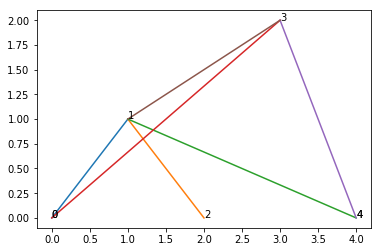

[[0, 2, 4], [1], [3]]

In [102]:
dag = DAG(5,8,2)
dag.Plot()
dag.generations

In [103]:
FormalPrint(dag.matrix)

[0, 1, 0, 1, 0]
[0, 0, 0, 1, 0]
[0, 1, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 1, 0, 1, 0]



[[0, 2, 4], [1], [3]]


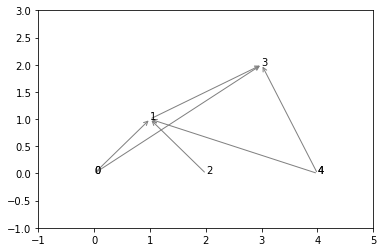

In [104]:
dag.PlotArrows()

In [105]:
def DecimalPrint(matrix):

    texto = ""
    for i in range(len(matrix)):
        linha = "["
        for j in range(len(matrix)):
            aux = "%.3f" % matrix[i][j]
            addaux = ", "
            if j == len(matrix)-1:
                addaux = ""
            aux += addaux
            linha += aux
        texto += linha + "]\n"
    print(texto)

In [106]:
def FormalPrint(matrix):
    texto = ""
    for i in range(len(matrix)):
        linha = "["
        for j in range(len(matrix)):
            aux = "%.0f" % matrix[i][j]
            addaux = ", "
            if j == len(matrix)-1:
                addaux = ""
            aux += addaux
            linha += aux
        texto += linha + "]\n"
    print(texto)